### API(Application Programming Interface)
- 어떤 프로그램의 기능을 외부에서 제어할 수 있도록 제공하는 인터페이스
- 외부에서 요청을 보내 어떤 서비스의 정보를 받아오거나 원하는 동작을 하도록 명령을 내릴 수 있도록 제공되는 소통 창구

In [ ]:
'''
퀴즈 생성해서 풀기
- Gemini를 이요해 주제에 따른 퀴즈 생성(JSON형식으로)
- 퀴즈 풀기 코드 생성
    - 퀴즈 정보가 담긴 JSON을 이용해 문제 푸는 화면 만들기
'''
import google.generativeai as genai
genai.configure(api_key="...")
model = genai.GenerativeModel("gemini-pro")

keyword = "광합성"
prompt = f"""다음 조건에 맞춰 "{keyword}에 대해 퀴즈를 JSON 형식을 ㅗ3개 출제하시오.
- 주어진 주제에 대해 5개 보기가 있는 객관식 문제 3개 생성
- 문제와 보기는 한국어로 작성
- 정답은 한 개만 있고, 보기 앞에 숫자는 없어야 함
- JSON 형태로 문제, 보기 5개(리스트), 정답, 해설을 생성. key 이름은 각각 question, options, answer, comment라고 하기
- 출력은 "["부터 시작"""

response = model.generate_content(prompt)
print(response.text)

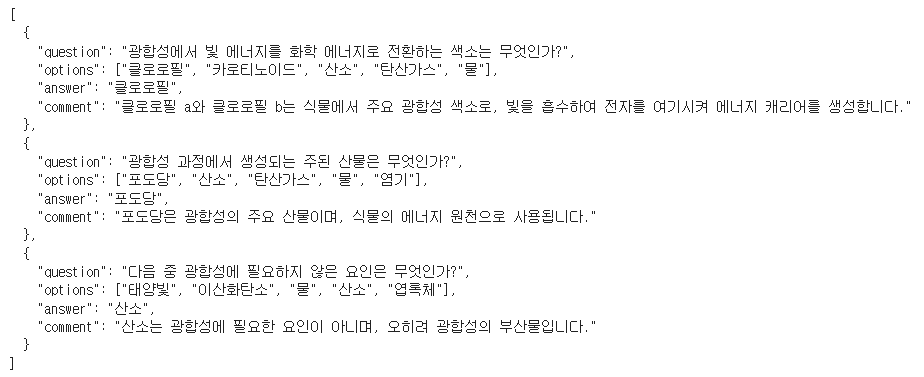

In [ ]:
'''
퀴즈 풀이 코드 생성
- 퀴즈 정보는 실행시 자동으로 생성되어 문자열 형태로 response.text에 저장되어 있고, 이를 Json 객체로 변환해야한다.
- options에 있는 보기를 이용해 문제를 출제하고, answer에 있는 정답과 비교해 채점한다.
- 이용자의 입력은 input()을 이용해 1-5의 숫자를 입력받는다.
- 문제를 풀고 나면 정답 여부를 알려주고, comment에 있는 해설을 출력해준다.
- 문제를 모두 풀고 난 뒤 점수를 알려준다.
'''
import json

# JSON 문자열을 파이썬 객체로 변환
quizzes = json.loads(response.text)

score = 0

# 퀴즈를 풀기 위한 루프
for idx, quiz in enumerate(quizzes):
    print(f"문제 {idx + 1}: {quiz['question']}")
    for i, option in enumerate(quiz['options']):
        print(f"{i + 1}. {option}")
    
    # 사용자 입력 받기
    user_answer = int(input("정답을 고르세요 (1-5): "))
    
    # 정답 확인
    if quiz['options'][user_answer - 1] == quiz['answer']:
        print("정답입니다!")
        score += 1
    else:
        print("오답입니다.")
    
    # 해설 출력
    print(f"해설: {quiz['comment']}\n")

# 최종 점수 출력
print(f"총 {len(quizzes)}문제 중 {score}문제를 맞추셨습니다.")

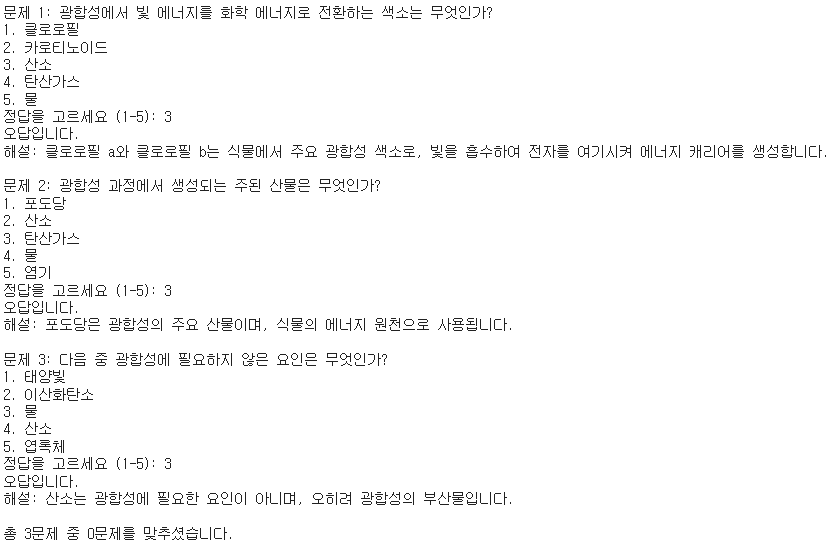